In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report


## IMPORTING DATASETS

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [4]:
print(train_data.shape)
print(test_data.shape)

(4250, 20)
(750, 20)


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
train_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<Axes: ylabel='True'>

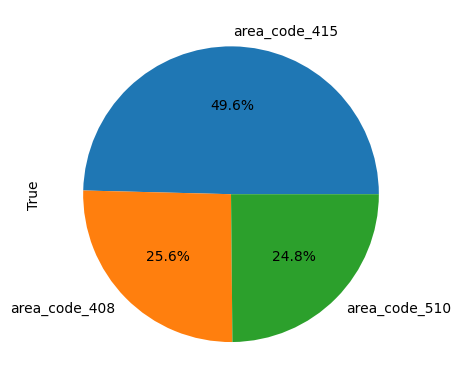

In [7]:
train_data["area_code"].value_counts().plot(kind='pie', label=True, autopct = '%.1f%%')

<Axes: xlabel='area_code', ylabel='count'>

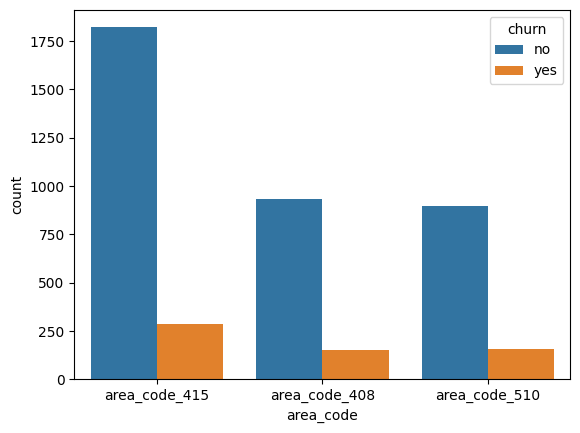

In [8]:
sns.countplot(data = train_data, x = 'area_code', hue = 'churn')

In [9]:
train_data["area_code"].value_counts()

area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64

## CLEANING THE DATA

In [10]:
train_data.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [11]:
train_data.duplicated().sum()

0

## PRE-PROCESSING

In [12]:
cat_cols = ['state','area_code','international_plan','voice_mail_plan','churn']

train_data[cat_cols] = train_data[cat_cols].astype('category')
test_data[cat_cols[:-1]] = test_data[cat_cols[:-1]].astype('category')



1. Calculate the total_net_minutes to reduce the number of features; we are going to do the same with calls, and charge
2. Convert all yes, no strings into ints such as in columns (voice_mail_plan, international_plan, and churn)
3. Convert the categorical values into onehote vectors such as (state, and area_code)
4. Drop all repeted features and useless columns such as area (code and state)

In [13]:
def clean_data(df):
  df['total_net_minutes'] = df["total_day_minutes"] + df["total_eve_minutes"] + df["total_night_minutes"]
  df["total_net_calls"]   = df["total_day_calls"] + df["total_eve_calls"] + df["total_night_calls"]
  df["total_net_charge"] = df["total_day_charge"] + df["total_eve_charge"] + df["total_night_charge"]

  df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
  df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})

  df.drop(columns = ["state", "area_code",'total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes',
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
  return df
clean_data(train_data)
clean_data(test_data)


,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96
...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,130,0,0,0,11.3,7,3.05,0,548.4,307,48.66
746,747,73,0,0,0,12.3,2,3.32,3,689.5,314,63.99
747,748,152,0,0,0,14.7,2,3.97,3,654.6,276,62.75
748,749,61,0,0,0,13.6,4,3.67,1,525.8,314,48.15


In [14]:
# convert "CHURN" column from categorical into numerical
train_data['churn'] = train_data['churn'].map({"yes": 1, "no": 0})

In [15]:
train_data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,73,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,75,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,50,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42


<Axes: xlabel='account_length', ylabel='Count'>

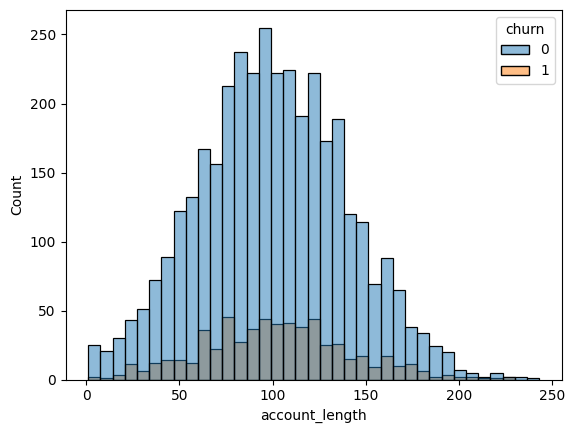

In [16]:
sns.histplot(x=train_data['account_length'],hue = train_data['churn'])

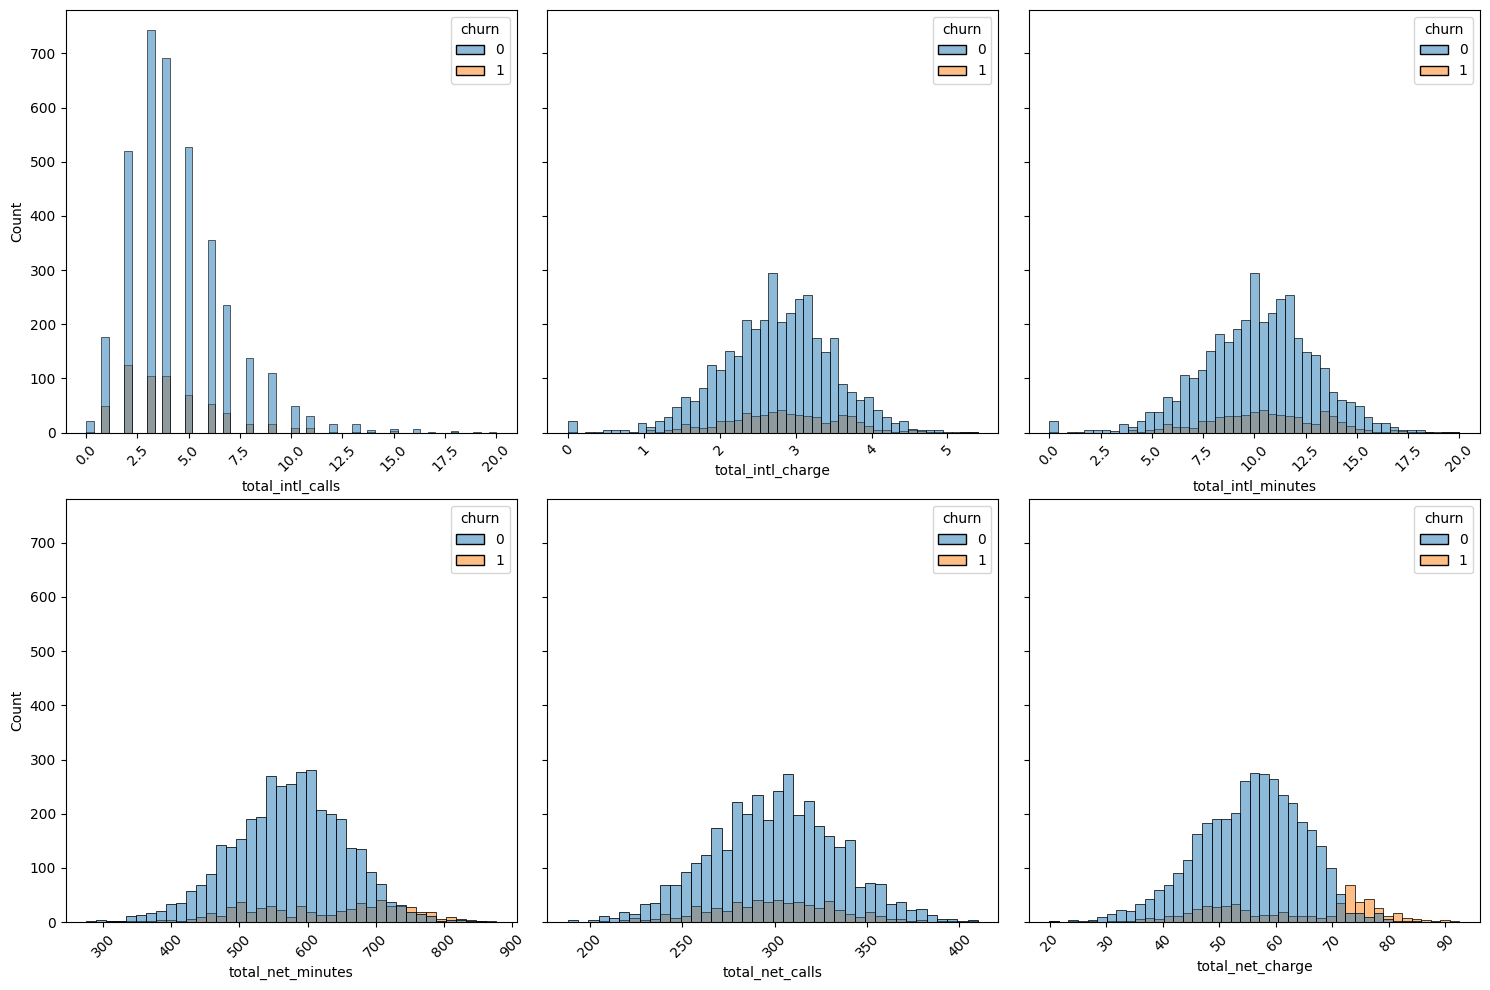

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

# Plotting
sns.histplot(data=train_data, x='total_intl_calls', hue='churn', ax=axes[0, 0])
sns.histplot(data=train_data, x='total_intl_charge', hue='churn', ax=axes[0, 1], color='orange')
sns.histplot(data=train_data, x='total_intl_minutes', hue='churn', ax=axes[0, 2], color='red')
sns.histplot(data=train_data, x='total_net_minutes', hue='churn', ax=axes[1, 0], color='red')
sns.histplot(data=train_data, x='total_net_calls', hue='churn', ax=axes[1, 1], color='green')
sns.histplot(data=train_data, x='total_net_charge', hue='churn', ax=axes[1, 2], color='blue')

# Rotate x-axis labels
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<Axes: xlabel='international_plan'>

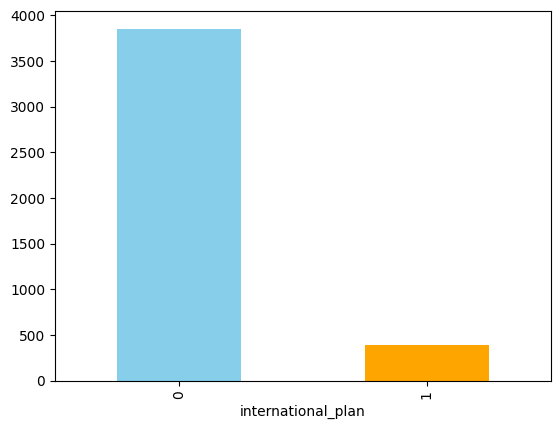

In [18]:
train_data['international_plan'].value_counts().plot(kind = 'bar', label = True, color = ["skyblue", "orange"])

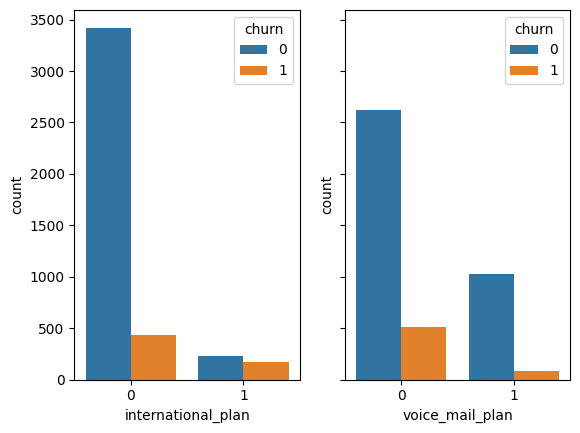

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

sns.countplot(data=train_data, x="international_plan", hue="churn", ax=axes[0])
sns.countplot(data=train_data, x="voice_mail_plan", hue="churn", ax=axes[1]);

CORRELATION BETWEEN NUMERICAL COLUMS



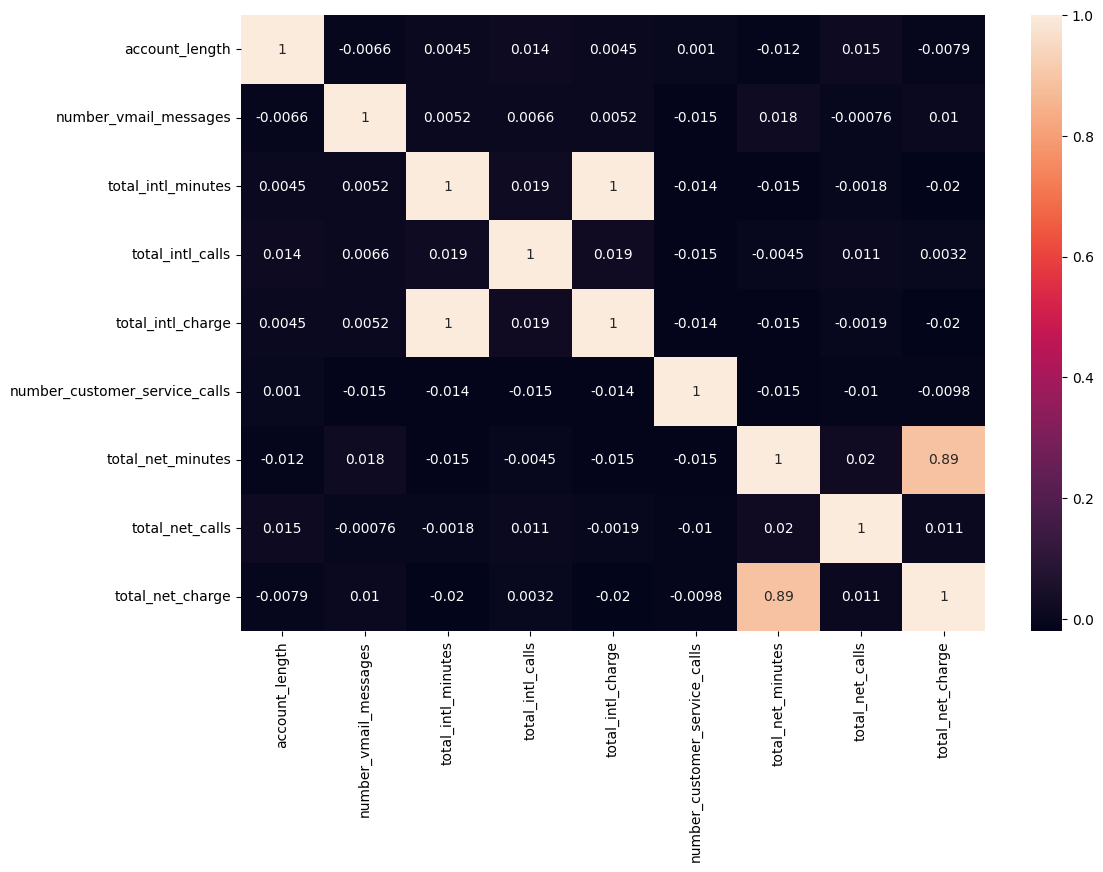

In [20]:
num_cols = train_data.select_dtypes(include = ["float", "int"]).columns
corr_data = train_data[num_cols].corr()
plt.figure(figsize = [12, 8])
sns.heatmap(corr_data, annot = True)
plt.show()

## DEALING WITH OUTLIERS

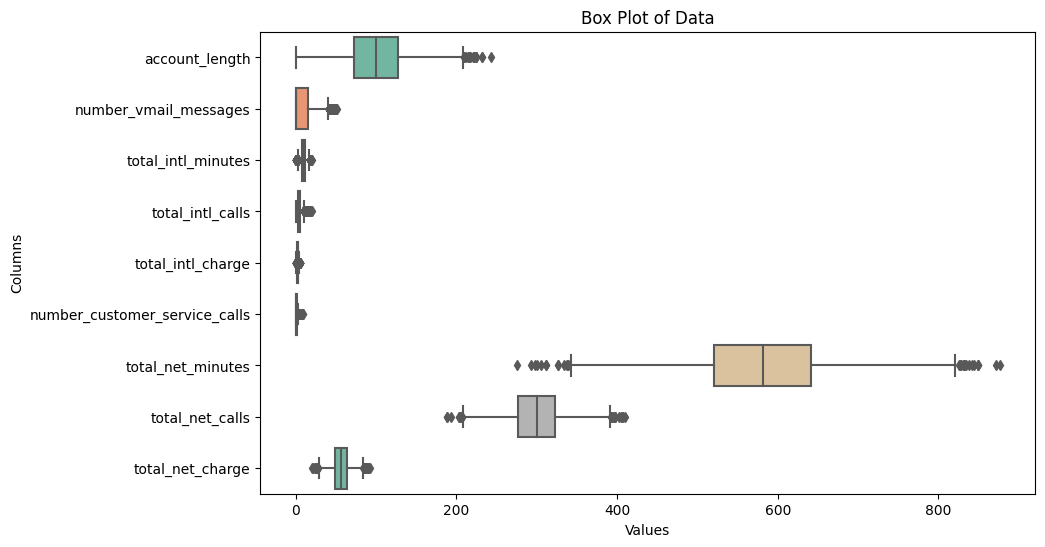

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, orient="h", palette="Set2")
plt.title("Box Plot of Data")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [22]:
def replace_outliers_with_median(series):
    # Calculate quartiles and IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    series = series.mask((series < lower_bound) | (series > upper_bound), series.median())
    return series

# Apply outlier replacement to each column
for col in num_cols:
    train_data[col] = replace_outliers_with_median(train_data[col])

train_data


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,73,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,75,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,50,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42


In [23]:
train_data.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
total_net_minutes                0
total_net_calls                  0
total_net_charge                 0
dtype: int64

In [24]:
train_data[num_cols] = train_data[num_cols].fillna(train_data[num_cols].median())
train_data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,73,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,75,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,50,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42


## SCALLING THE TRAIN DATA

In [25]:
num_cols = train_data.select_dtypes(include = ["float", "int"]).columns
cat_cols = ["voice_mail_plan", "international_plan"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = scaler.fit_transform(train_data[num_cols])
train_scaled = pd.DataFrame(scaled_cols, columns = num_cols )
train_scaled[cat_cols] = train_data[cat_cols]
train_scaled.head()

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,voice_mail_plan,international_plan
0,0.188764,1.550048,1.340576,-0.591544,1.341366,-0.295258,0.355208,0.867180,-0.112588,1,0
1,0.961465,-0.542948,0.749910,0.380074,0.743382,-1.361399,-0.623766,0.837428,0.233794,0,0
2,-0.403641,-0.542948,-1.455244,1.351692,-1.458952,0.770882,-0.263764,-1.542703,0.836458,0,1
3,-0.635452,-0.542948,-0.077023,-0.591544,-0.073378,1.837023,-0.917575,1.670474,-0.731270,0,1
4,0.549358,1.389048,-1.100845,1.351692,-1.094327,1.837023,2.303867,0.420905,1.963700,1,0


SCALLING THE TEST DATA

In [26]:
num_cols = test_data.select_dtypes(include = ["float", "int"]).columns
cat_cols = ["voice_mail_plan", "international_plan"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = scaler.fit_transform(test_data[num_cols])
test_scaled = pd.DataFrame(scaled_cols, columns = num_cols )
test_scaled[cat_cols] = test_data[cat_cols]
test_scaled.head()

,id,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,voice_mail_plan,international_plan
0,-1.729743,0.696065,1.172240,-0.106243,-0.613702,-0.106976,-0.497639,1.369617,-0.041312,1.536327,1,0
1,-1.725124,0.444001,-0.599015,-1.442710,0.625821,-1.445297,-1.281734,0.713930,0.473065,0.865723,0,1
2,-1.720505,-0.967554,-0.599015,1.013500,0.625821,1.017213,1.854646,0.525958,-1.705472,-0.112683,0,0
3,-1.715887,-0.186157,-0.599015,-0.792537,-0.613702,-0.789520,1.070551,-0.495721,1.350532,-0.013299,0,0
4,-1.711268,1.855557,-0.599015,1.880397,0.212647,1.887122,1.070551,0.760369,0.049461,-0.094350,0,0


## SPLITING THE DATA

In [27]:

x= train_scaled
x[cat_cols] = x[cat_cols].astype(int)
y = pd.Series(train_data['churn'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2975, 11), (1275, 11), (2975,), (1275,))

## BUILDING MACHINE LEARNING MODELS

## LOGISTIC REGRESSION

In [28]:

lo_model = LogisticRegression()
lo_model.fit(x_train, y_train)
y_predict = lo_model.predict(x_test)

In [29]:
lo_accuracy = accuracy_score(y_predict, y_test)
lo_accuracy

0.8564705882352941

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1096
           1       0.46      0.14      0.21       179

    accuracy                           0.86      1275
   macro avg       0.67      0.56      0.57      1275
weighted avg       0.82      0.86      0.82      1275



## Naive bayes

In [31]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_predict = nb_model.predict(x_test)

In [32]:
nb_acc = accuracy_score(y_predict, y_test)
nb_acc

0.8627450980392157

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1096
           1       0.51      0.50      0.50       179

    accuracy                           0.86      1275
   macro avg       0.71      0.71      0.71      1275
weighted avg       0.86      0.86      0.86      1275



## SUPPORT VECTOR MACHINE

In [34]:
svm = SVC()
svm.fit(x_train, y_train)
y_preidct = svm.predict(x_test)

In [35]:
svm_acc = accuracy_score(y_predict, y_test)
svm_acc

0.8627450980392157

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1096
           1       0.51      0.50      0.50       179

    accuracy                           0.86      1275
   macro avg       0.71      0.71      0.71      1275
weighted avg       0.86      0.86      0.86      1275



## DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_model_predict = dt_model.predict(x_test)

In [38]:
accuracy = accuracy_score(dt_model_predict, y_test)
accuracy

0.9027450980392157

In [39]:
print(classification_report(y_test, dt_model_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1096
           1       0.65      0.67      0.66       179

    accuracy                           0.90      1275
   macro avg       0.80      0.81      0.80      1275
weighted avg       0.90      0.90      0.90      1275



## RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_model_predict = rf_model.predict(x_test)

In [41]:
rf_accuracy = accuracy_score(rf_model_predict, y_test)
rf_accuracy

0.9427450980392157

In [42]:
print(classification_report(y_test, rf_model_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1096
           1       0.96      0.61      0.75       179

    accuracy                           0.94      1275
   macro avg       0.95      0.81      0.86      1275
weighted avg       0.94      0.94      0.94      1275



## XGBOOST CLASSIFIER

In [43]:
xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)
xg_model_predict = xg_model.predict(x_test)

In [44]:
xg_accuracy = accuracy_score(xg_model_predict, y_test)
xg_accuracy

0.9380392156862745

In [45]:
print(classification_report(y_test, xg_model_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1096
           1       0.89      0.64      0.74       179

    accuracy                           0.94      1275
   macro avg       0.92      0.81      0.85      1275
weighted avg       0.94      0.94      0.93      1275



## K-NEAREST NEIGHBORS

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8854901960784314
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1096
           1       0.72      0.30      0.43       179

    accuracy                           0.89      1275
   macro avg       0.81      0.64      0.68      1275
weighted avg       0.87      0.89      0.86      1275



## ADA BOOST

In [47]:
adaboost = AdaBoostClassifier(n_estimators=40, random_state=42)

adaboost.fit(x_train, y_train)

y_pred = adaboost.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9090196078431373
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1096
           1       0.76      0.51      0.61       179

    accuracy                           0.91      1275
   macro avg       0.84      0.74      0.78      1275
weighted avg       0.90      0.91      0.90      1275



## GRADIENT BOOSTING

In [48]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

gradient_boosting.fit(x_train, y_train)

y_pred = gradient_boosting.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9427450980392157
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1096
           1       0.95      0.63      0.75       179

    accuracy                           0.94      1275
   macro avg       0.95      0.81      0.86      1275
weighted avg       0.94      0.94      0.94      1275



## BAGGING CLASSIFIER

In [49]:

base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the classifier
bagging_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred = bagging_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1096
           1       0.86      0.63      0.73       179

    accuracy                           0.93      1275
   macro avg       0.90      0.81      0.84      1275
weighted avg       0.93      0.93      0.93      1275



## PREDICTION CHURN FOR THE TEST DATA





In [50]:
test_data.head()

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [51]:
final_test = test_scaled[:5].drop(columns = 'id')
final_test

,account_length,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge,voice_mail_plan,international_plan
0,0.696065,1.172240,-0.106243,-0.613702,-0.106976,-0.497639,1.369617,-0.041312,1.536327,1,0
1,0.444001,-0.599015,-1.442710,0.625821,-1.445297,-1.281734,0.713930,0.473065,0.865723,0,1
2,-0.967554,-0.599015,1.013500,0.625821,1.017213,1.854646,0.525958,-1.705472,-0.112683,0,0
3,-0.186157,-0.599015,-0.792537,-0.613702,-0.789520,1.070551,-0.495721,1.350532,-0.013299,0,0
4,1.855557,-0.599015,1.880397,0.212647,1.887122,1.070551,0.760369,0.049461,-0.094350,0,0


## PREDICTING CHURN FOR TEST DATA WITH GRADIENT BOOSTING CLASSIFIER

In [52]:
gbt_pred = gradient_boosting.predict(final_test)
gbt_pred

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
sample_data = pd.read_csv('sampleSubmission.csv')
data = sample_data[:5].copy()
data.reset_index(drop=True, inplace = True)
data.churn = gbt_pred
data.churn = data.churn.map({1:'yes',0:'no'})
data

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


## PREDICTING CHURN FOR TEST DATA WITH RANDOM FOREST CLASSIFIER

In [54]:
rf_pred = rf_model.predict(final_test)
rf_pred

array([0, 0, 0, 0, 0], dtype=int64)

In [55]:
data = sample_data[:5].copy()
data.reset_index(drop=True, inplace = True)
data.churn = rf_pred
data.churn = data.churn.map({1:'yes',0:'no'})
data

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
